In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
    ENV["PYTHON"] = "python3";
end
 
#Pkg.build("PyCall")

 Activating environment at `~/HOME/Programming/JuliaProbo/Project.toml`


"python3"

In [2]:
using JuliaProbo

┌ Info: Precompiling JuliaProbo [3c270a3a-2612-4193-9bf7-68cd93c8ae26]
└ @ Base loading.jl:1278


In [3]:
xlim = [-5.0, 5.0]
ylim = [-5.0, 5.0]
world = PuddleWorld(xlim, ylim)
push!(world, Puddle([-2.0, 0.0], [0.0, 2.0], 0.1))
push!(world, Puddle([-0.5, -2.0], [2.5, 1.0], 0.1))

2-element Array{Puddle,1}:
 Puddle([-2.0, 0.0], [0.0, 2.0], 0.1)
 Puddle([-0.5, -2.0], [2.5, 1.0], 0.1)

In [9]:
import Seaborn, Images, PyPlot
import Plots: @animate, gif

sampling_num = 10
pe = DynamicProgramming([0.1, 0.1, pi/20], Goal(-3.0, -3.0), dt=0.1);
init_value(pe)
init_policy(pe)
init_state_transition_probs(pe, 0.1, sampling_num)
init_depth(pe, world, sampling_num)

Δ = 1e100
sweep_num = 0
while Δ > 0.01 && sweep_num < 10
    Δ = policy_evaluation_sweep(pe)
    sweep_num += 1
    println("$(sweep_num): Δ = $(Δ)")
end

1: Δ = 98.9
2: Δ = 96.19999999999999
3: Δ = 78.5546
4: Δ = 65.542429952
5: Δ = 57.54468346639998
6: Δ = 51.14600832645078
7: Δ = 46.108182806296234
8: Δ = 42.10974297232714
9: Δ = 39.742421170227885
10: Δ = 37.66328578910857


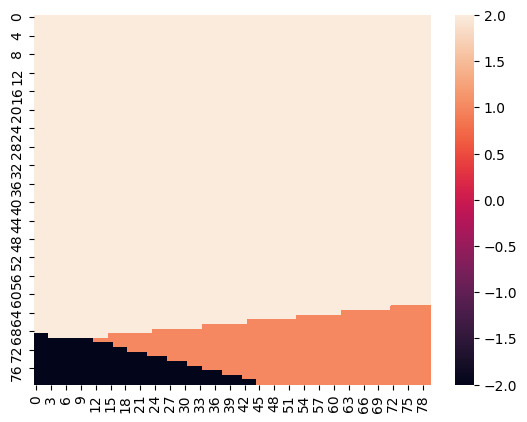

PyObject <AxesSubplot:>

In [11]:
p = zeros(Float64, pe.index_nums...)
for index in pe.indices
    p[index...] = sum(pe.policy_[index..., :])
end

Seaborn.heatmap(rotl90(p[:, :, 20]))